<a href="https://colab.research.google.com/github/Doda1979/PRPM/blob/main/Priklady_s_vysledky/Prirustkova_metoda_nosnik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Přírůstková metoda - spojitý nosník

## Zadání

Konstrukce na obrázku má konstantní průřez a je vyrobena z ideálně pružnoplastického materiálu.
Mezní plastický moment průřezu je $M_0 = 500$ kNm, celková délka nosníku je 3m. Nosník je zatížena dvěma svislými silami , které působí přesně ve třetinách délky nosníku, jednotlivé úseky mají tedy délku $L = 1$ m.

Proveďte přírůstkovou pružnoplastickou analýzu.

Určete hodnotu síly $F$ v okamžiku vzniku prvního plastického kloubu a v mezním plastickém stavu konstrukce.
       
Pro oba stavy vykreslete odpovídající průběhy momentů a posouvajících sil.  
Vliv stlačení nebo protažení střednice zanedbejte.

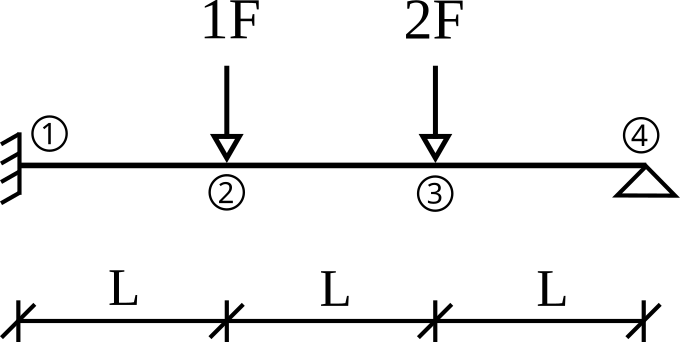

In [275]:
from IPython.display import display, Image
display(Image(filename="Prirustkova_met_nosnik_zadani.png", width=400))

Import potřebných knihoven

In [276]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

#!pip install sympy
from sympy import *
import sympy as smp

import matplotlib.patches as patches


In [277]:
#Funkce pro vykreslení průběhu ohybových momentů na nosníku:
def Vykresleni_M(valM1, valM2, valM3, valM4):

    # Délky jednotlivých částí
    lengths = [val_L, val_L, val_L]  # délky mezi styčníky

    # Souřadnice styčníků (x-ové hodnoty)
    x_positions = [0]
    for length in lengths:
        x_positions.append(x_positions[-1] + length)

    # Hodnoty momentů ve styčnících [kNm]
    M_values = [valM1, valM2, valM3, valM4]

    # Vykreslení průběhu momentů
    plt.plot(x_positions, M_values, color='blue', linestyle='-')

    # Vykreslení nosníku černě plnou čarou
    plt.plot([x_positions[0], x_positions[-1]], [0, 0], color='black', linewidth=1.5)

    # Přidání hodnot v místech styčníků
    for x, y in zip(x_positions, M_values):
        # Vypisujeme absolutní hodnotu (bez znaménka)
        if y != 0:
            plt.text(x, y, f"{abs(y):.2f}", fontsize=10, ha='center', va='top' if y > 0 else 'bottom')
        else:
            # Posunutí textu pro nulovou hodnotu
            plt.text(x, y + 5, f"{abs(y):.2f}", fontsize=10, ha='center', va='top', verticalalignment='top')

    # Svislé spojnice pro všechny styčníky s osou X
    for i, y in enumerate(M_values):
        plt.plot([x_positions[i], x_positions[i]], [0, y], color='blue', linestyle='-')

    # Titulek a popisky
    plt.title('Průběh ohybových momentů [kNm]')
    plt.xlabel('Délka nosníku [m]')

    # Odstranění zobrazení svislé osy
    plt.gca().yaxis.set_ticks([])  # Odstranění čárek
    plt.gca().yaxis.set_ticklabels([])  # Odstranění hodnot

    # Volba orientace osy y (kladná poloosa dolů - spodní vlákna)
    plt.gca().invert_yaxis()

    # Nastavení popisků na ose x v místech styčníků
    plt.xticks(x_positions)

    # Zobrazení grafu
    plt.show()




In [278]:
# Funkce pro vykreslení průběhu posouvajících sil na nosníku:
def Vykresleni_V(valV12, valV21, valV23, valV32, valV34, valV43):

    # Délky jednotlivých částí
    lengths = [val_L, val_L, val_L]  # délky mezi styčníky

    # Souřadnice styčníků (x-ové hodnoty)
    x_positions = []
    for i, length in enumerate(lengths):
        x_positions.append(sum(lengths[:i]))  # Levá hodnota pro styčník
        x_positions.append(sum(lengths[:i + 1]))  # Pravá hodnota pro styčník

    # Hodnoty posouvajících sil ve styčnících [kN]
    V_values = [valV12, valV21, valV23, valV32, valV34, valV43]

    # Vykreslení posouvajících sil
    plt.figure(figsize=(10, 5))

    # Vykreslení průběhu posouvajících sil (konstantní úseky)
    plt.plot(x_positions, V_values, color='green', linestyle='-')

    # Vykreslení nosníku černě plnou čarou
    plt.plot([x_positions[0], x_positions[-1]], [0, 0], color='black', linewidth=1.5)

    # Přidání hodnot ve styčnících
    for x, y in zip(x_positions, V_values):
        plt.text(x, y + (2 if y > 0 else -2), f"{y:.2f}", fontsize=10, ha='center', va='bottom' if y > 0 else 'top')

    # Svislé spojnice pro všechny styčníky s osou X
    for i, y in enumerate(V_values):
        plt.plot([x_positions[i], x_positions[i]], [0, y], color='green', linestyle='-')

    # Titulek a popisky
    plt.title('Průběh posouvajících sil [kN]')
    plt.xlabel('Délka nosníku [m]')

    # Odstranění zobrazení svislé osy
    plt.gca().yaxis.set_ticks([])  # Odstranění čárek
    plt.gca().yaxis.set_ticklabels([])  # Odstranění hodnot

    # Nastavení popisků na ose x v místech styčníků
    plt.xticks(x_positions)

    # Zobrazení grafu
    plt.show()

## Řešení

Definice proměnných a jejich hodnot:

In [279]:
L = smp.symbols('L', real = True, positive = True)

F = smp.symbols('F', real = True)

val_L = 1
val_M0 = 500 # [kNm]


## Vznik 1. plastického kloubu

Vyřešíme průběh momentů od refernečního jednotkového zatížení.

In [280]:
# Z tabulek pro ZDM:
M_1 = -13 / 9 * F * L
val_M1_ref1 = M_1.subs({F: 1, L: val_L})
print(f"Moment M12 od jednotkové velikosti síly F: {val_M1_ref1:.3f} kNm")

M_2 = 10 / 27 * F * L
val_M2_ref1 = M_2.subs({F: 1, L: val_L})
print(f"Moment M2 od jednotkové velikosti síly F: {val_M2_ref1:.3f} kNm")

M_3 = 32 / 27 * F * L
val_M3_ref1 = M_3.subs({F: 1, L: val_L})
print(f"Moment M3 od jednotkové velikosti síly F: {val_M3_ref1:.3f} kNm")

values = {"1": val_M1_ref1, "2": val_M2_ref1, "3": val_M3_ref1}

# Porovnání velikosti momentů
max_M_val = max(values, key=lambda k: abs(values[k]))
max_moment_position = max_M_val

max_M_ref1 = values[max_moment_position]

print(f"Největší je hodnota momentu v průřezu č. {max_moment_position}, tj. {max_M_ref1} kN.")
print("\n")
F_pl1 = val_M0 / abs(max_M_ref1)
print(f"\033[1mHodnota síly F v okamžiku vzniku 1. plast. kloubu je {F_pl1:.3f} kN.\033[0m")

Moment M12 od jednotkové velikosti síly F: -1.444 kNm
Moment M2 od jednotkové velikosti síly F: 0.370 kNm
Moment M3 od jednotkové velikosti síly F: 1.185 kNm
Největší je hodnota momentu v průřezu č. 1, tj. -1.44444444444444 kN.


Hodnota síly F v okamžiku vzniku 1. plast. kloubu je 346.154 kN.


In [281]:
val_M1 = -13 / 9 * F_pl1 * val_L
val_M2 = 10 / 27 * F_pl1 * val_L
val_M3 = 32 / 27 * F_pl1 * val_L
val_M4 = 0


print(f"Moment M1 v okamžiku vzniku 1. plast. kloubu: {val_M1:.3f} kNm")
print(f"Moment M2 v okamžiku vzniku 1. plast. kloubu: {val_M2:.3f} kNm")
print(f"Moment M3 v okamžiku vzniku 1. plast. kloubu: {val_M3:.3f} kNm")
print(f"Moment M4 v okamžiku vzniku 1. plast. kloubu: {val_M4:.3f} kNm")


Moment M1 v okamžiku vzniku 1. plast. kloubu: -500.000 kNm
Moment M2 v okamžiku vzniku 1. plast. kloubu: 128.205 kNm
Moment M3 v okamžiku vzniku 1. plast. kloubu: 410.256 kNm
Moment M4 v okamžiku vzniku 1. plast. kloubu: 0.000 kNm


**Vykreslení průběhů momentů pro okamžik vzniku 1. plastického kloubu**


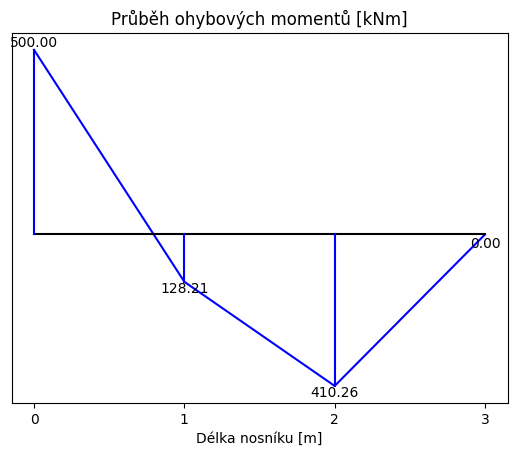

In [282]:
Vykresleni_M(val_M1, val_M2, val_M3, val_M4)

**Vykreslení průběhu posouvajících sil**

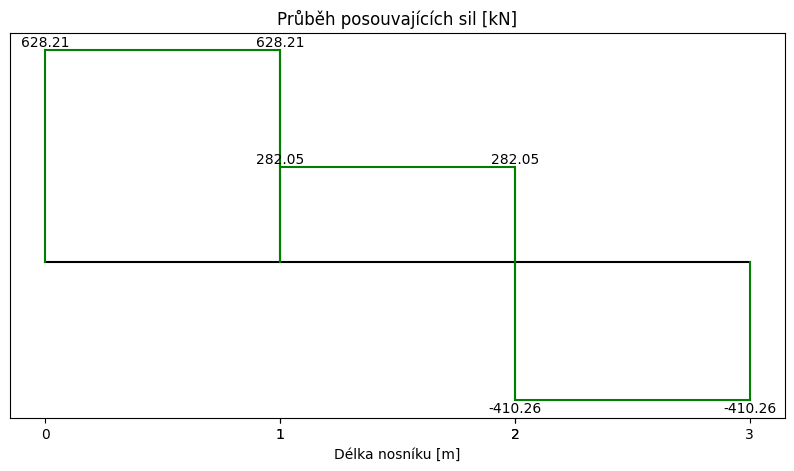

In [283]:
val_V43 = -val_M3 / val_L
val_V34 = val_V43
val_V32 = val_V34 + 2*F_pl1
val_V23 = val_V32
val_V21 = val_V23 + F_pl1
val_V12 = val_V21


Vykresleni_V(val_V12, val_V21, val_V23, val_V32, val_V34, val_V43)

## Vznik 2. plastického kloubu

Pro další výpočet je nutné změnit statické schéma, do místa vzniku plastického kloubu umístíme kloub a vykreslíme průběh přírůstku momentů od referenčního zatížení na konstrukci s upraveným schématem.

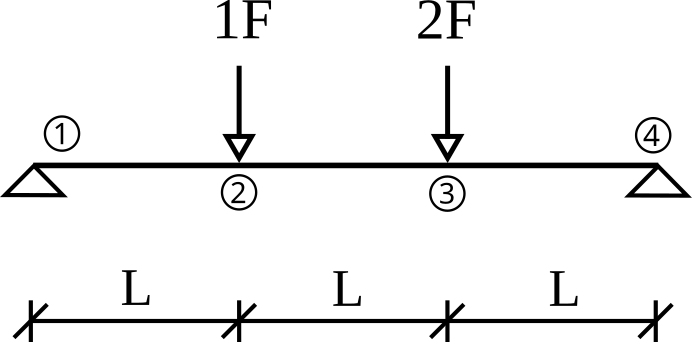

In [284]:
from IPython.display import display, Image
display(Image(filename="Prirustkova_met_nosnik_schema_2.png", width=400))

In [285]:
dM2 = 4/3 * F * L
val_dM2 = dM2.subs({F: 1, L: val_L})
print(f"Moment M2 od jednotkové velikosti síly F: {val_dM2:.3f} kNm")

dM3 = 5/3 * F * L
val_dM3 = dM3.subs({F: 1, L: val_L})
print(f"Moment M3 od jednotkové velikosti síly F: {val_dM3:.3f} kNm")

delta_MF = val_M0 - val_M3
print(f"Maximální možný přírůstek momentu M3: {delta_MF:.3f} kNm")

delta_F = delta_MF / val_dM3

print(f"Přírůstek síly F v okamžiku vzniku 2. plast. kloubu je {delta_F:.3f} kN.")

print("\n")
F_pl2 = F_pl1 + delta_F
print(f"\033[1mHodnota síly F v okamžiku vzniku 2. plast. kloubu je {F_pl2:.3f} kN.\033[0m")

Moment M2 od jednotkové velikosti síly F: 1.333 kNm
Moment M3 od jednotkové velikosti síly F: 1.667 kNm
Maximální možný přírůstek momentu M3: 89.744 kNm
Přírůstek síly F v okamžiku vzniku 2. plast. kloubu je 53.846 kN.


Hodnota síly F v okamžiku vzniku 2. plast. kloubu je 400.000 kN.


**Vykreslení průběhů momentů**

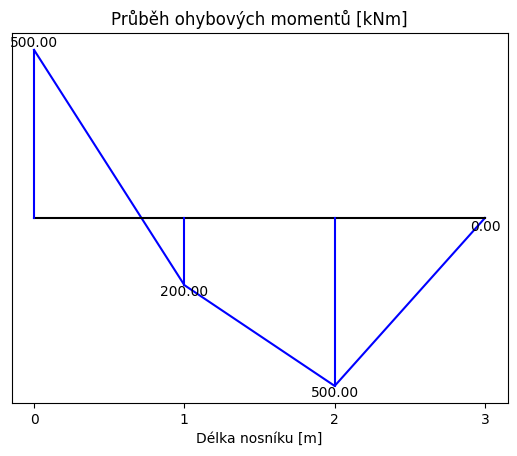

In [286]:
val_M1_2 = -val_M0
val_M2_2 = val_M2 + val_dM2*delta_F
val_M3_2 = val_M3 + val_dM3*delta_F
val_M4_2 = 0


Vykresleni_M(val_M1_2, val_M2_2, val_M3_2, val_M4_2)



**Vykreslení průběhů posouvajících sil**

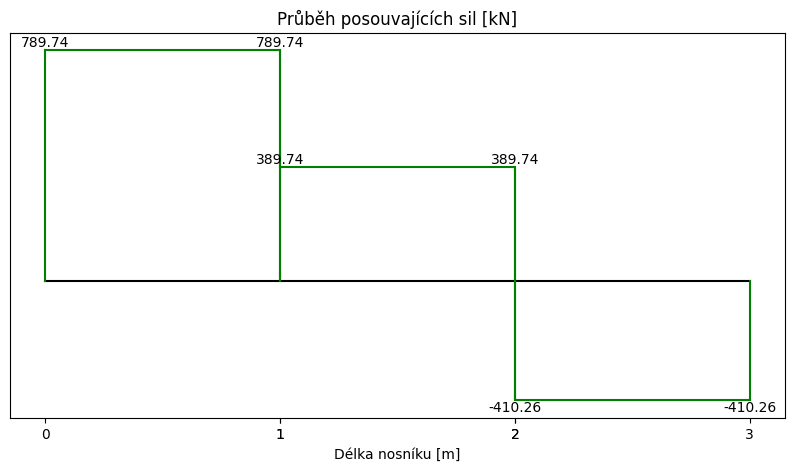

In [287]:
val_V43 = -val_M3 / val_L
val_V34 = val_V43
val_V32 = val_V34 + 2*F_pl2
val_V23 = val_V32
val_V21 = val_V23 + F_pl2
val_V12 = val_V21

Vykresleni_V(val_V12, val_V21, val_V23, val_V32, val_V34, val_V43)
